Problem statement: Plotting a monthly percentage return heatmap for Banknifty.

1. Plotting heatmap with the help of pivot
2. Manipulating heatmap according to our need

In [194]:
import numpy as np
import pandas as pd
import datetime

In [195]:
df = pd.read_csv('/content/3131.csv')

In [196]:
df.head()

,datetime,open,high,low,close,volume
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0


In [197]:
#standardization of features

'''from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df_std = df['open'].values.reshape(-1,1)
df_std = std.fit_transform(df_std)
df_std = pd.DataFrame(df_std)
df['open'] = df_std'''

"from sklearn.preprocessing import StandardScaler\nstd = StandardScaler()\ndf_std = df['open'].values.reshape(-1,1)\ndf_std = std.fit_transform(df_std)\ndf_std = pd.DataFrame(df_std)\ndf['open'] = df_std"

In [198]:

'''df_std2 = df['close'].values.reshape(-1,1)
df_std2 = std.fit_transform(df_std2)
df_std2 = pd.DataFrame(df_std2)
df['close'] = df_std2'''

"df_std2 = df['close'].values.reshape(-1,1)\ndf_std2 = std.fit_transform(df_std2)\ndf_std2 = pd.DataFrame(df_std2)\ndf['close'] = df_std2"

In [199]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['Month'] = df['datetime'].dt.month

In [183]:
df.head()

,datetime,open,high,low,close,volume,Month
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,1
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,1
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,1
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,1
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,1


In [184]:
df.tail()

,datetime,open,high,low,close,volume,Month
3443,2019-12-18,32292.25,32293.65,32017.30,32244.25,0.0,12
3444,2019-12-19,32281.65,32328.35,32085.05,32241.45,0.0,12
3445,2019-12-20,32266.85,32443.35,32199.45,32384.95,0.0,12
3446,2019-12-23,32381.00,32502.80,32196.85,32339.45,0.0,12
3447,2019-12-24,32337.80,32390.35,32246.05,32280.75,0.0,12


In [185]:
df['Year'] = df['datetime'].dt.year

In [186]:
df.head()

,datetime,open,high,low,close,volume,Month,Year
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,1,2006
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,1,2006
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,1,2006
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,1,2006
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,1,2006


In [187]:
df['MonthlyReturn'] = (df['close'] - df['open'])/df['open']

In [188]:
df.head()

,datetime,open,high,low,close,volume,Month,Year,MonthlyReturn
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,1,2006,-0.002343
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,1,2006,0.015183
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,1,2006,0.016147
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,1,2006,0.009811
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,1,2006,-0.002444


In [189]:
df.MonthlyReturn.unique()

array([-0.00234292,  0.01518278,  0.01614659, ...,  0.0036601 ,
       -0.00128316, -0.00176419])

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       3448 non-null   datetime64[ns]
 1   open           3448 non-null   float64       
 2   high           3448 non-null   float64       
 3   low            3448 non-null   float64       
 4   close          3448 non-null   float64       
 5   volume         3448 non-null   float64       
 6   Month          3448 non-null   int64         
 7   Year           3448 non-null   int64         
 8   MonthlyReturn  3448 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 242.6 KB


In [191]:
df.drop_duplicates(inplace=True)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3448 entries, 0 to 3447
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       3448 non-null   datetime64[ns]
 1   open           3448 non-null   float64       
 2   high           3448 non-null   float64       
 3   low            3448 non-null   float64       
 4   close          3448 non-null   float64       
 5   volume         3448 non-null   float64       
 6   Month          3448 non-null   int64         
 7   Year           3448 non-null   int64         
 8   MonthlyReturn  3448 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 269.4 KB


<function matplotlib.pyplot.show>

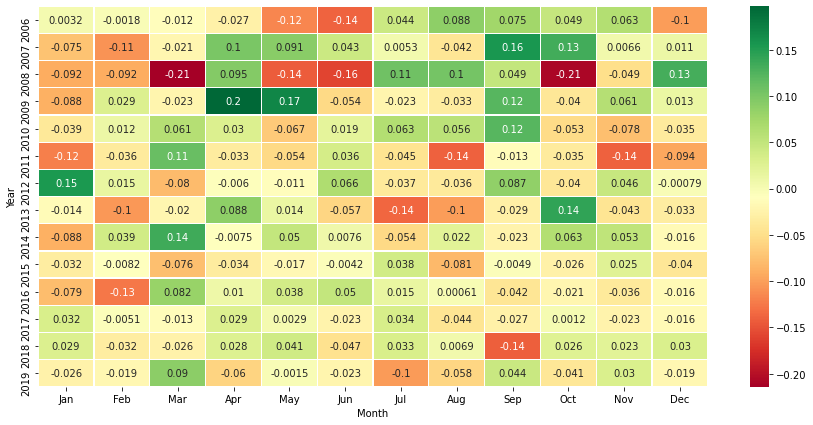

In [193]:
import seaborn as sns
import matplotlib.pyplot as plt

#refer to below link on using pivot
#https://cumsum.wordpress.com/2019/12/28/valueerror-index-contains-duplicate-entries-cannot-reshape/

MonthlyR = df.groupby(by=['Year', 'Month']).MonthlyReturn.sum().reset_index()
MonthlyR = MonthlyR.pivot_table(index="Year", columns="Month", values="MonthlyReturn")

plt.figure(figsize=(15,7))
sns.heatmap(MonthlyR,annot=True,cmap="RdYlGn",linewidth=0.3)

xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
plt.show